In [31]:
# 데이터 분석을 위해 필요한 외부 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# mpg 데이터 세트 불러오기(https://vincentarelbundock.github.io/Rdatasets/datasets.html 에서 다운로드) 및 데이터 확인
mpg = pd.read_csv('/content/mpg.csv')
mpg.head()

,rownames,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


rownames의 경우 데이터가 아닌 번호이기 때문에 제거함

In [5]:
# 데이터 전처리 및 확인
mpg.drop(columns=['rownames'], inplace=True)
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


mpg 데이터 세트는 자동차의 연비(Miles Per Gallon, MPG)와 관련된 다양한 정보를 포함

1. **manufacturer**: 자동차 제조사
   - 데이터 타입: object
   - 예: 'audi', 'ford', 'toyota' 등

2. **model**: 자동차 모델
   - 데이터 타입: object
   - 예: 'a4', 'mustang', 'corolla' 등

3. **displ**: 엔진 배기량 (리터)
   - 데이터 타입: float64
   - 예: 1.8, 2.0, 3.1 등

4. **year**: 제조 연도
   - 데이터 타입: int64
   - 예: 1999, 2008 등

5. **cyl**: 실린더 수
   - 데이터 타입: int64
   - 예: 4, 6, 8 등

6. **trans**: 변속기 유형
   - 데이터 타입: object
   - 예: 'auto(l5)', 'manual(m6)' 등

7. **drv**: 구동 방식
   - 데이터 타입: object
   - 'f': 전륜구동 (front-wheel drive)
   - 'r': 후륜구동 (rear-wheel drive)
   - '4': 사륜구동 (4-wheel drive)

8. **cty**: 도시 연비 (MPG)
   - 데이터 타입: int64
   - 예: 18, 21, 24 등

9. **hwy**: 고속도로 연비 (MPG)
   - 데이터 타입: int64
   - 예: 25, 28, 31 등

10. **fl**: 연료 종류
    - 데이터 타입: object
    - 'c': CNG (Compressed Natural Gas)
    - 'd': Diesel
    - 'e': Ethanol
    - 'p': Premium
    - 'r': Regular

11. **class**: 자동차 유형
    - 데이터 타입: object
    - 예: 'compact', 'suv', 'midsize', '2seater' 등

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64


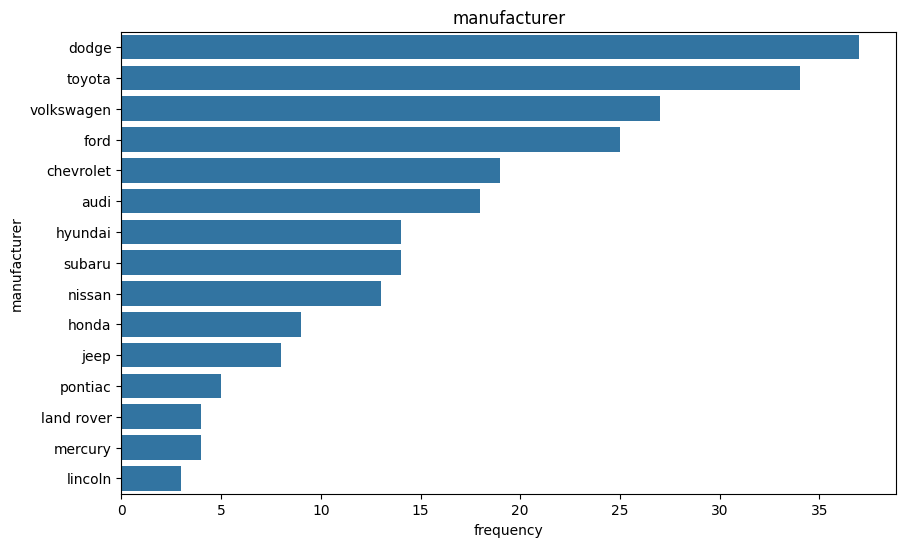

In [6]:
# 제조사 빈도수 및 바 그래프
manufacturer_counts = mpg['manufacturer'].value_counts()
print(manufacturer_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index)
plt.title('manufacturer')
plt.xlabel('frequency')
plt.ylabel('manufacturer')
plt.show()

model
caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
dakota pickup 4wd          9
mustang                    9
impreza awd                8
a4 quattro                 8
grand cherokee 4wd         8
a4                         7
toyota tacoma 4wd          7
camry solara               7
camry                      7
tiburon                    7
sonata                     7
passat                     7
f150 pickup 4wd            7
durango 4wd                7
explorer 4wd               6
new beetle                 6
altima                     6
4runner 4wd                6
forester awd               6
gti                        5
c1500 suburban 2wd         5
corolla                    5
corvette                   5
malibu                     5
grand prix                 5
k1500 tahoe 4wd            4
pathfinder 4wd             4
mountaineer 4wd            4
range rover                4
maxima                     3
navigato

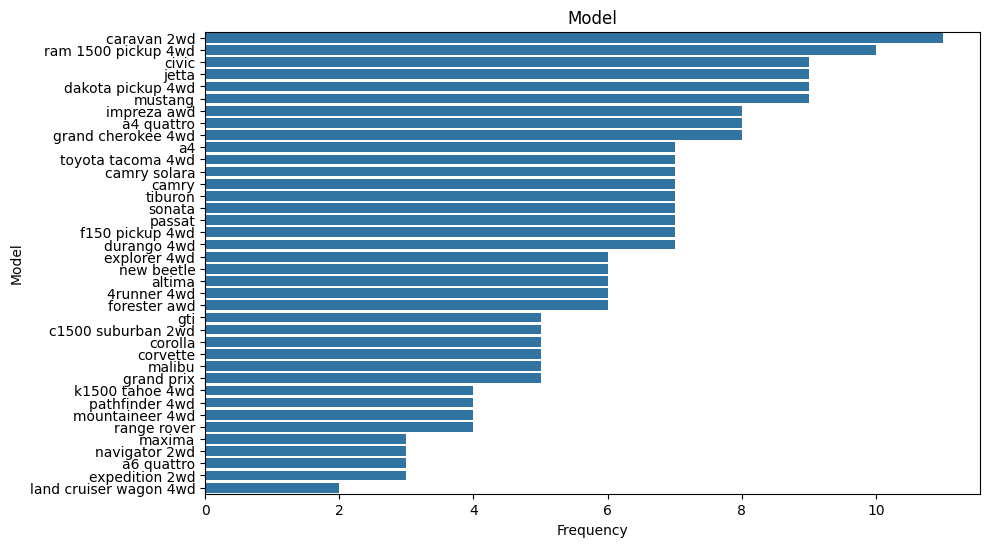

In [7]:
# 모델 빈도수 및 바 그래프
model_counts = mpg['model'].value_counts()
print(model_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.values, y=model_counts.index)
plt.title('Model')
plt.xlabel('Frequency')
plt.ylabel('Model')
plt.show()

trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64


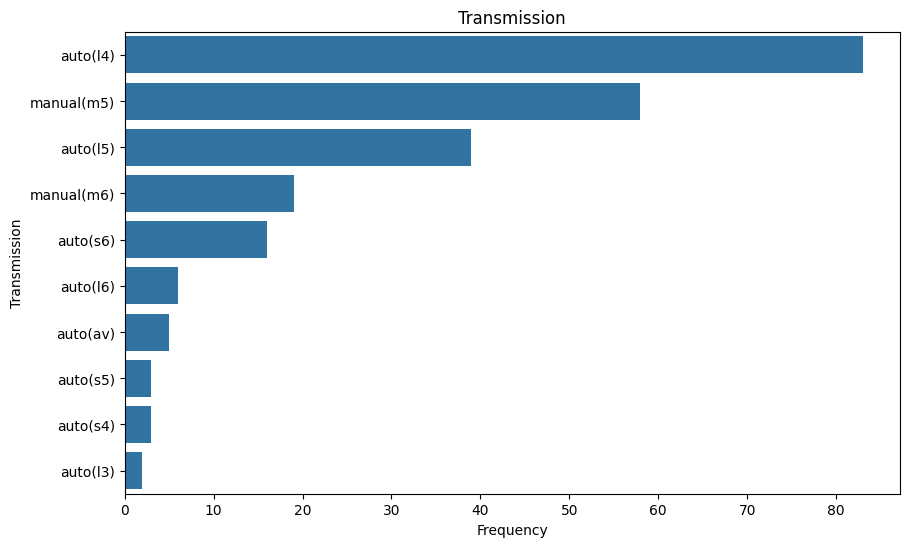

In [8]:
# 변속기 빈도수 및 바 그래프
trans_counts = mpg['trans'].value_counts()
print(trans_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=trans_counts.values, y=trans_counts.index)
plt.title('Transmission')
plt.xlabel('Frequency')
plt.ylabel('Transmission')
plt.show()

drv
f    106
4    103
r     25
Name: count, dtype: int64


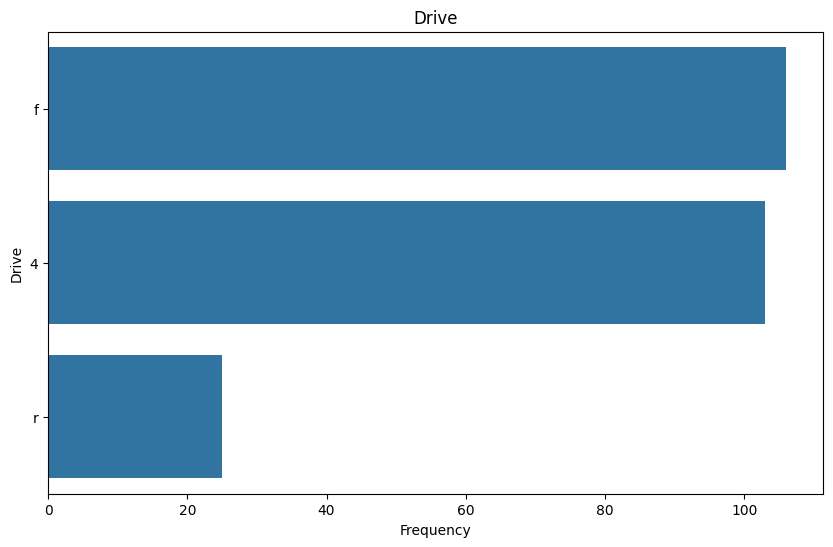

In [12]:
# 구동 방식 빈도수 및 바 그래프
drv_counts = mpg['drv'].value_counts()
print(drv_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=drv_counts.values, y=drv_counts.index)
plt.title('Drive')
plt.xlabel('Frequency')
plt.ylabel('Drive')
plt.show()

fl
r    168
p     52
e      8
d      5
c      1
Name: count, dtype: int64


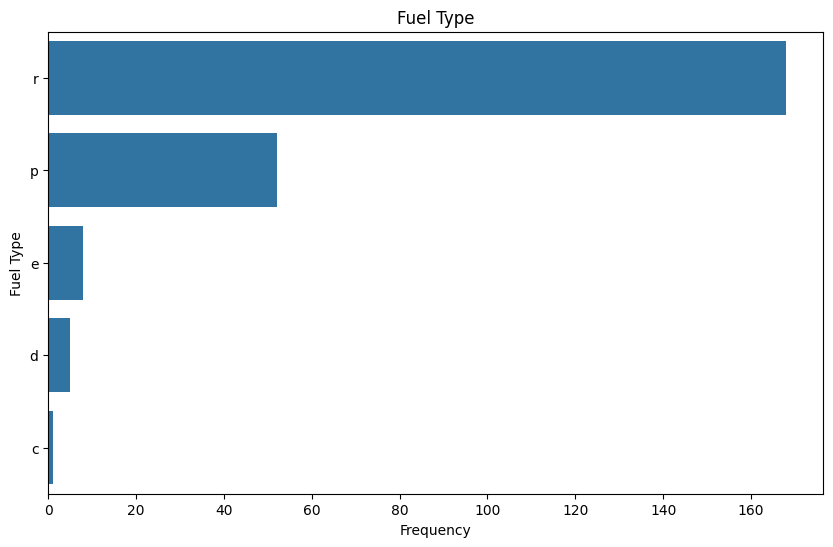

In [9]:
# 연료 타입 빈도수 및 바 그래프
fl_counts = mpg['fl'].value_counts()
print(fl_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=fl_counts.values, y=fl_counts.index)
plt.title('Fuel Type')
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.show()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64


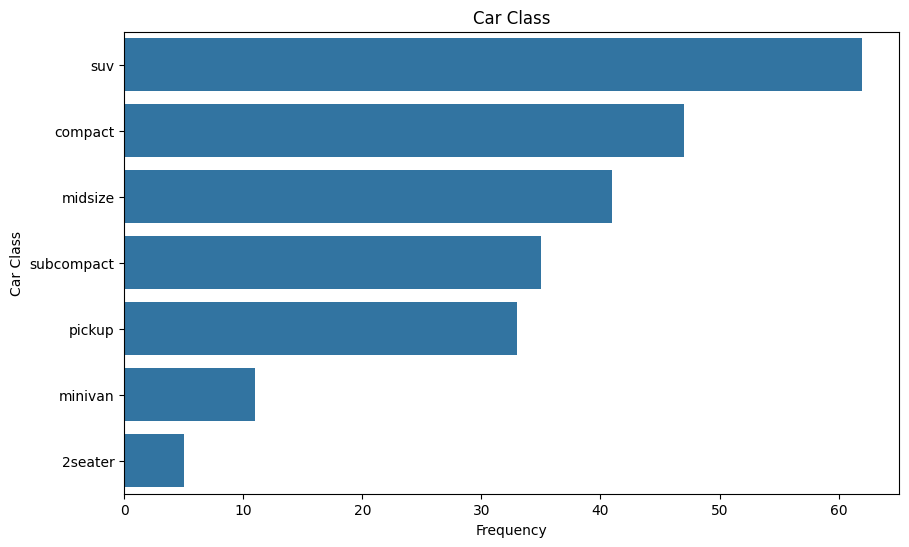

In [10]:
# 자동차 유형 빈도수 및 바 그래프
class_counts = mpg['class'].value_counts()
print(class_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.values, y=class_counts.index)
plt.title('Car Class')
plt.xlabel('Frequency')
plt.ylabel('Car Class')
plt.show()

In [11]:
# 양적 자료 요약 통계량 확인
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


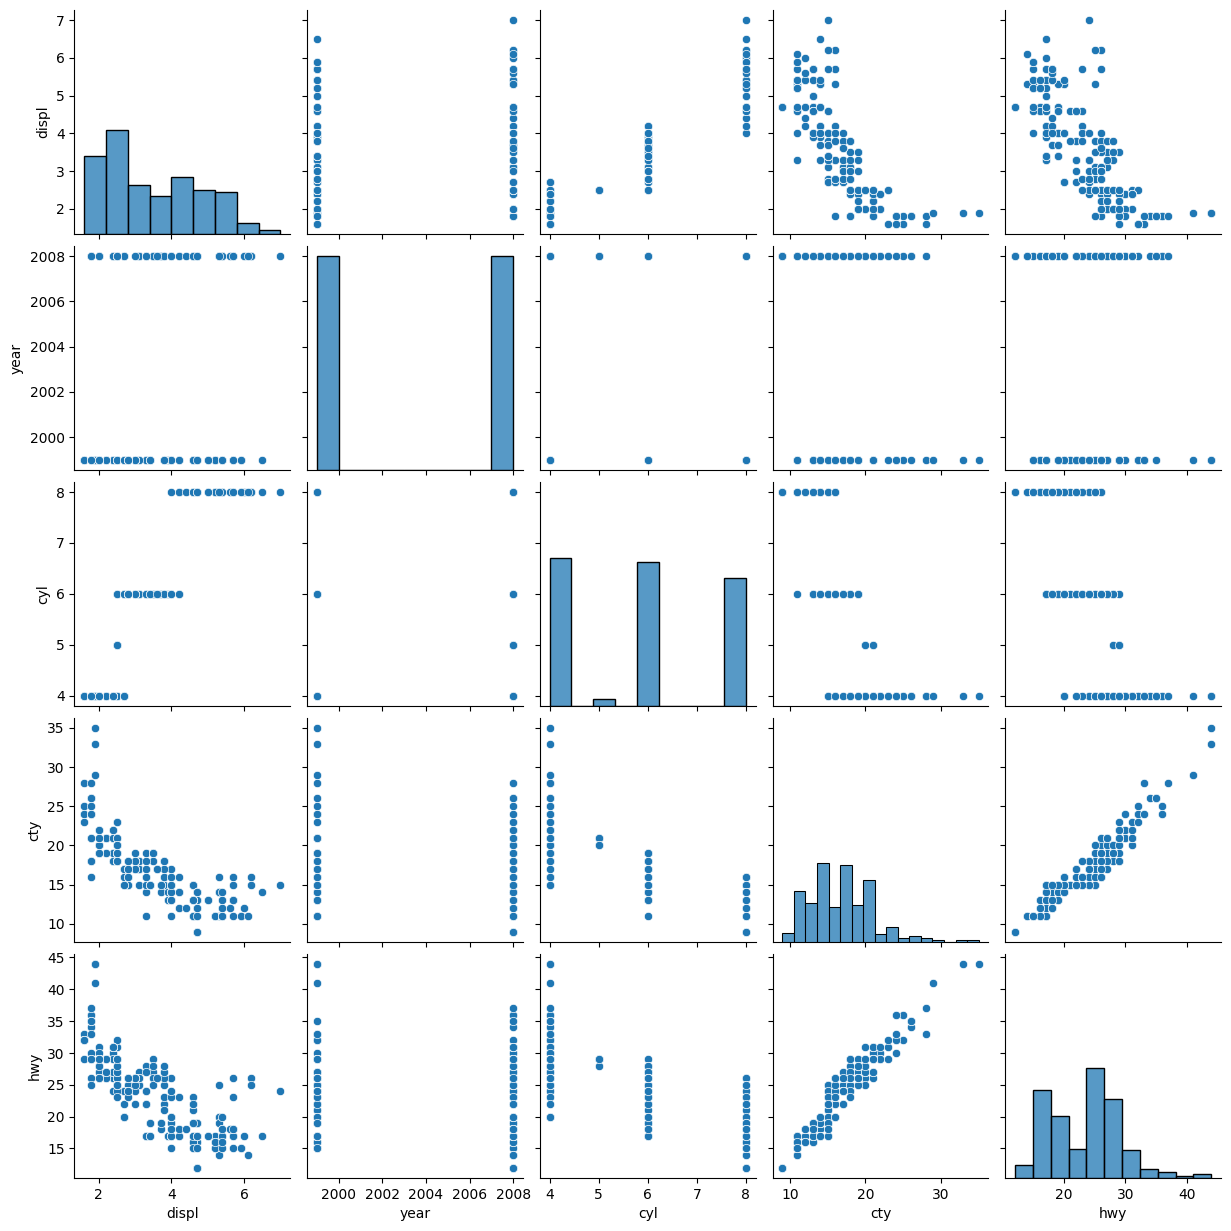

In [13]:
# 양적 자료 산점도 및 관계 확인
sns.pairplot(mpg)

displ
1.6     5
1.8    14
1.9     3
2.0    21
2.2     6
2.4    13
2.5    20
2.7     8
2.8    10
3.0     8
3.1     6
3.3     9
3.4     4
3.5     5
3.6     2
3.7     3
3.8     8
3.9     3
4.0    15
4.2     4
4.4     1
4.6    11
4.7    17
5.0     2
5.2     5
5.3     6
5.4     8
5.6     1
5.7     8
5.9     2
6.0     1
6.1     1
6.2     2
6.5     1
7.0     1
Name: count, dtype: int64


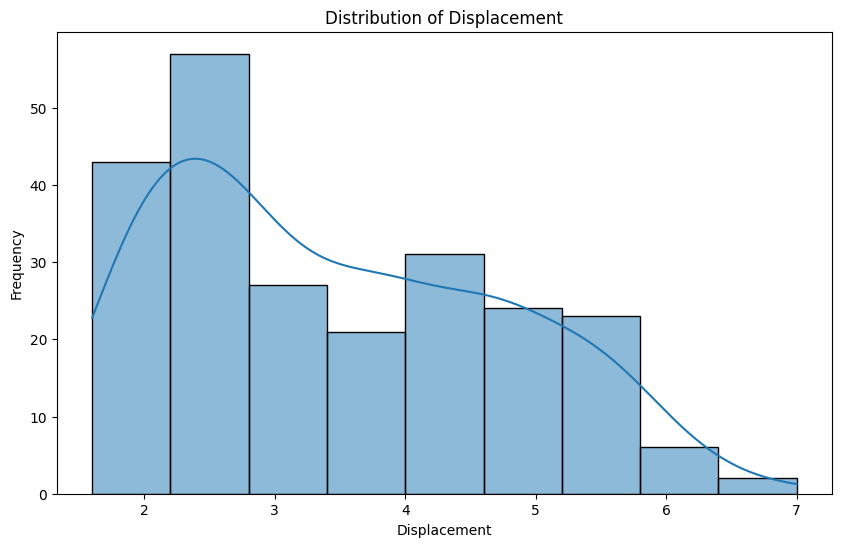

In [14]:
# 배기량 분포 확인
displ_counts = mpg['displ'].value_counts().sort_index()
print(displ_counts)
plt.figure(figsize=(10, 6))
sns.histplot(mpg['displ'], kde=True)
plt.title('Distribution of Displacement')
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.show()

cty
9      5
11    20
12     8
13    21
14    19
15    24
16    19
17    16
18    26
19    20
20    11
21    23
22     4
23     3
24     5
25     2
26     3
28     2
29     1
33     1
35     1
Name: count, dtype: int64


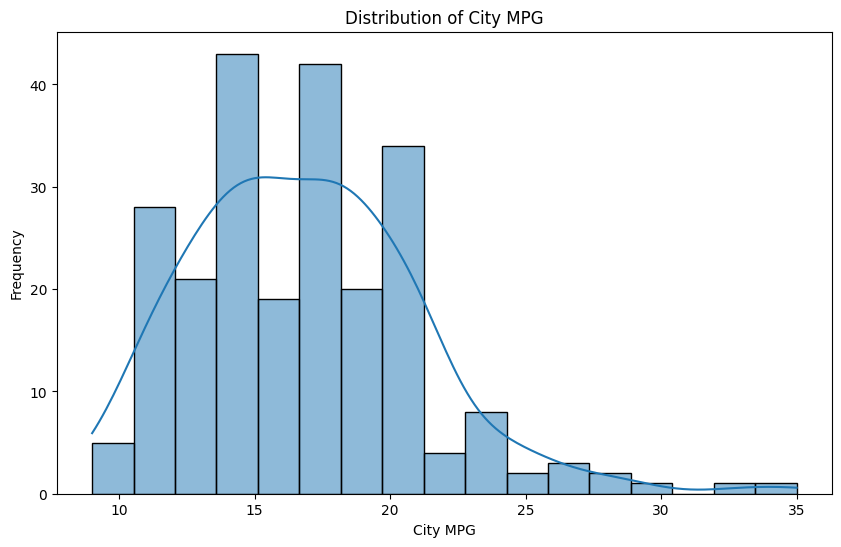

In [15]:
# 연비 (도시) 분포 확인
cty_counts = mpg['cty'].value_counts().sort_index()
print(cty_counts)
plt.figure(figsize=(10, 6))
sns.histplot(mpg['cty'], kde=True)
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.show()

hwy
12     5
14     2
15    10
16     7
17    31
18    10
19    13
20    11
21     2
22     7
23     7
24    13
25    15
26    32
27    14
28     7
29    22
30     4
31     7
32     4
33     2
34     1
35     2
36     2
37     1
41     1
44     2
Name: count, dtype: int64


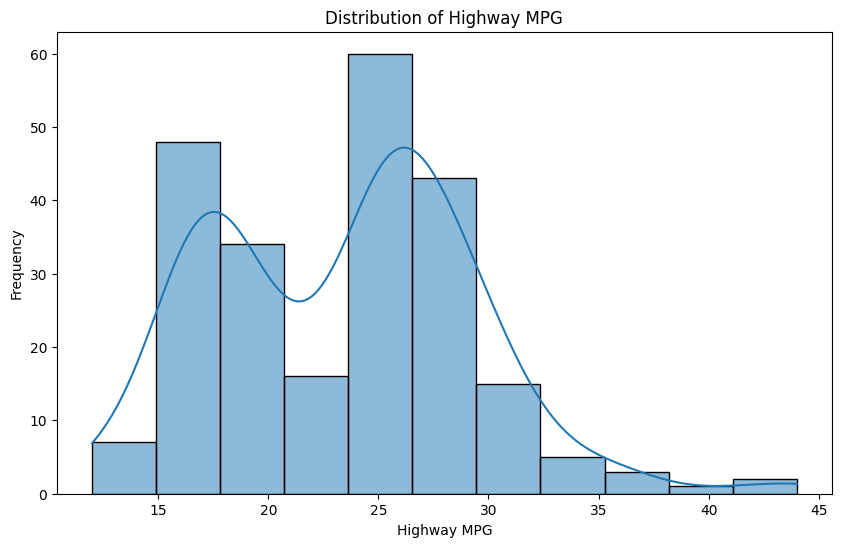

In [16]:
# 연비 (고속도로) 분포 확인
hwy_counts = mpg['hwy'].value_counts().sort_index()
print(hwy_counts)
plt.figure(figsize=(10, 6))
sns.histplot(mpg['hwy'], kde=True)
plt.title('Distribution of Highway MPG')
plt.xlabel('Highway MPG')
plt.ylabel('Frequency')
plt.show()

year
1999    117
2008    117
Name: count, dtype: int64


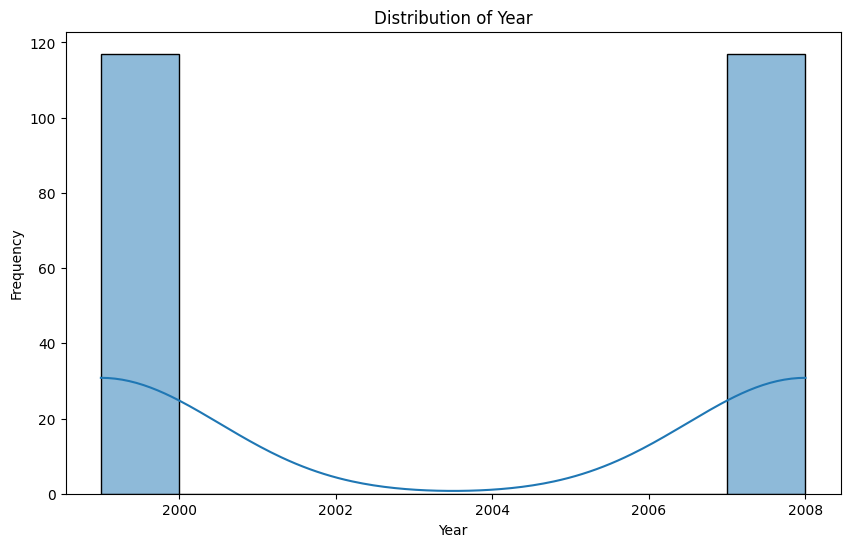

In [17]:
# 연도 분포 확인
year_counts = mpg['year'].value_counts().sort_index()
print(year_counts)
plt.figure(figsize=(10, 6))
sns.histplot(mpg['year'], kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

cyl
4    81
5     4
6    79
8    70
Name: count, dtype: int64


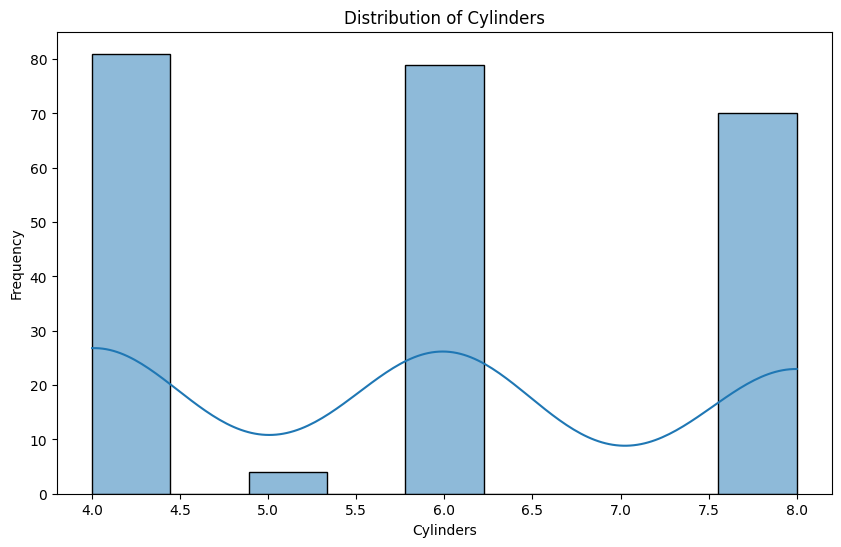

In [18]:
# 실린더 수 분포 확인
cyl_counts = mpg['cyl'].value_counts().sort_index()
print(cyl_counts)
plt.figure(figsize=(10, 6))
sns.histplot(mpg['cyl'], kde=True)
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()

<Axes: >

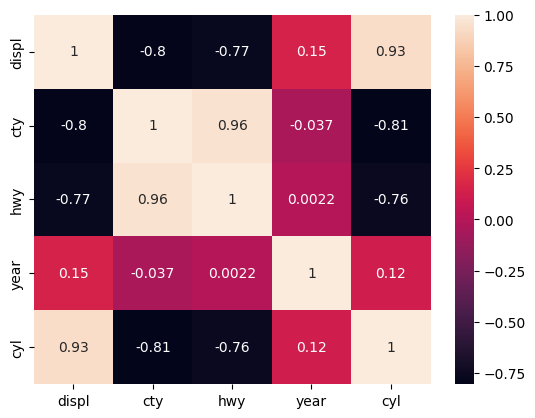

In [19]:
# 양적자료의 히트맵과 상관계수를 통한 상관 분석
quantitative_vars = ['displ', 'cty', 'hwy', 'year', 'cyl']
correlation_matrix = mpg[quantitative_vars].corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True)

히트맵은 변수들 간의 상관 관계를 시각적으로 표현한 것으로, 상관 계수 값은 -1에서 1 사이의 값을 가짐. 1에 가까울수록 강한 양의 상관 관계를, -1에 가까울수록 강한 음의 상관 관계를 나타냄. 0에 가까울수록 상관 관계가 거의 없음을 의미함.

히트맵 분석 결과

1. **displ (배기량)와 cty (도시 연비)**
   - 상관 계수: -0.8
   - 해석: 배기량이 증가할수록 도시 연비가 감소하는 경향이 강하게 나타남. 이는 일반적으로 배기량이 큰 차는 연비가 낮다는 것을 의미함.

2. **displ (배기량)와 hwy (고속도로 연비)**
   - 상관 계수: -0.77
   - 해석: 배기량이 증가할수록 고속도로 연비도 감소하는 경향이 강하게 나타납니다.

3. **displ (배기량)와 cyl (실린더 수)**
   - 상관 계수: 0.93
   - 해석: 배기량이 증가할수록 실린더 수도 증가하는 경향이 매우 강하게 나타남. 이는 배기량이 큰 엔진일수록 실린더 수가 많기 때문.

4. **cty (도시 연비)와 hwy (고속도로 연비)**
   - 상관 계수: 0.96
   - 해석: 도시 연비와 고속도로 연비 사이에 매우 강한 양의 상관 관계가 있음. 도시에서 연비가 좋은 차는 고속도로에서도 연비가 좋은 경향이 있음. 일반적으로 자동차 시스템의 연비가 좋으면 도시에서의 연비와 고속도로에서의 연비가 좋기 때문으로 생각됨.

5. **cty (도시 연비)와 cyl (실린더 수)**
   - 상관 계수: -0.81
   - 해석: 도시 연비가 감소할수록 실린더 수가 증가하는 경향이 강하게 나타남. 이는 실린더 수가 많은 차는 연비가 낮다는 것을 의미함

6. **hwy (고속도로 연비)와 cyl (실린더 수)**
   - 상관 계수: -0.76
   - 해석: 고속도로 연비가 감소할수록 실린더 수가 증가하는 경향이 강하게 나타남.

7. **year (연식)과 다른 변수들**
   - year와 displ: 0.15 (약한 양의 상관 관계)
   - year와 cty: -0.037 (거의 상관 관계 없음)
   - year와 hwy: 0.0022 (거의 상관 관계 없음)
   - year와 cyl: 0.12 (약한 양의 상관 관계)
   - 해석: 연식은 다른 변수들과 약하거나 거의 상관 관계가 없음. 이는 연식이 차량의 배기량, 연비, 실린더 수와 직접적인 관련이 적음을 보여줌.

요약하면, 배기량, 실린더 수와 연비 사이에는 강한 상관 관계가 있으며, 연비가 좋은 차는 도시와 고속도로 모두에서 연비가 좋은 경향이 있음. 연식은 다른 변수들과 큰 상관 관계가 없는 것으로 보임.

고속도로 연비와 도시 연비는 상관 계수가 1에 가까운 상관 관계가 아주 큰 변수들이기에 이를 평균 낸 데이터에 대해서 데이터 분석을 실시 분석 결과가 흔들리지 않는다고 판단 됨  

그래서 이에 대해서 평균을 낸 평균 연비 값에 대한 데이터 추가하고 이에 대한 분석을 실시하려고 함

또한 연식은 예상과 달리 연비와 큰 상관이 없었기에 연식에 대해서는 제외하고 나머지 데이터 분석을 실시함

In [21]:
# 평균 연비(고속도로 연비와 도시 연비의 평균) 데이터 추가 및 연식 데이터 제거
mpg['mpg'] = ((mpg['cty']+mpg['hwy'])/2)
mpg.drop(columns=['year'], inplace=True)
mpg.head()

,manufacturer,model,displ,cyl,trans,drv,cty,hwy,fl,class,mpg
0,audi,a4,1.8,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,6,auto(l5),f,16,26,p,compact,21.0


연비에 큰 영향을 미치는 요인에 대해서 알아보려고 하기 때문에 양적 자료의 경우 연비를 선택하고 이에 대한 범주형 자료의 분포를 시각화 하려고 한다.   
모델의 경우 너무 다양하여 분석에 오히려 방해가 될 것으로 예상해 분석 대상에서 제외했음

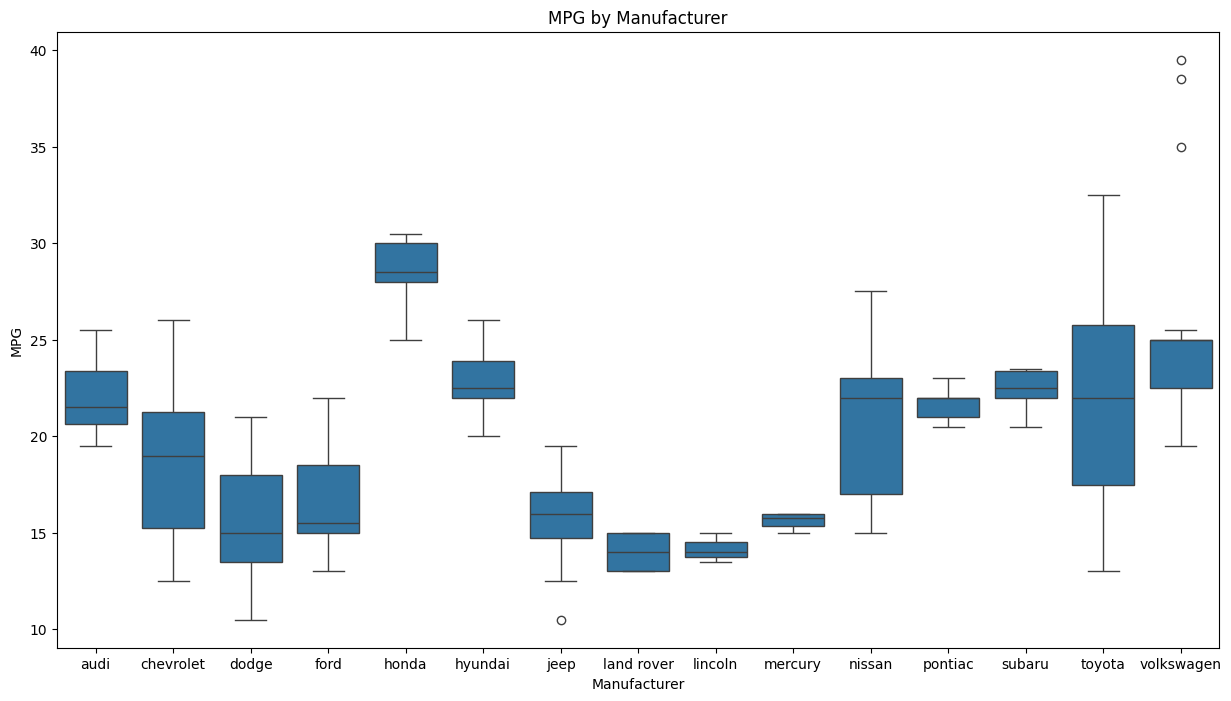

In [22]:
# 평균 연비와 제조사의 관계 시각화
plt.figure(figsize=(15, 8))
sns.boxplot(x='manufacturer', y='mpg', data=mpg)
plt.title('MPG by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('MPG')
plt.show()

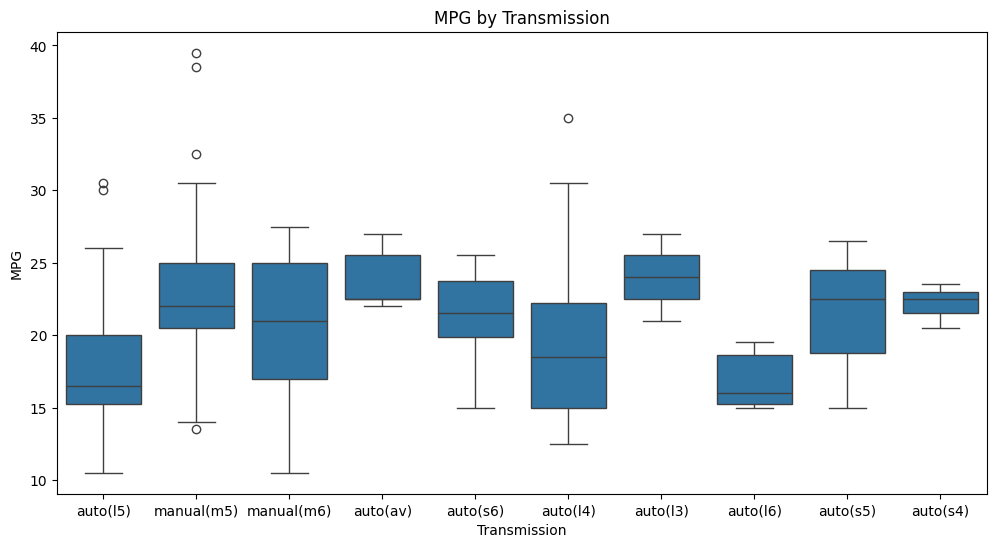

In [23]:
# 평균 연비와 변속기의 관계 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='trans', y='mpg', data=mpg)
plt.title('MPG by Transmission')
plt.xlabel('Transmission')
plt.ylabel('MPG')
plt.show()

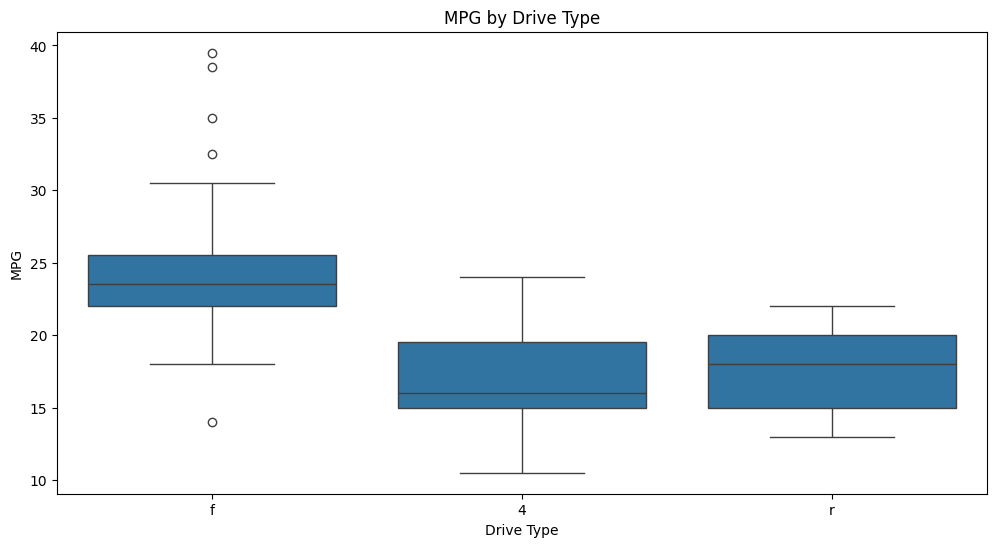

In [24]:
# 평균 연비와 구동 방식의 관계 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='drv', y='mpg', data=mpg)
plt.title('MPG by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('MPG')
plt.show()

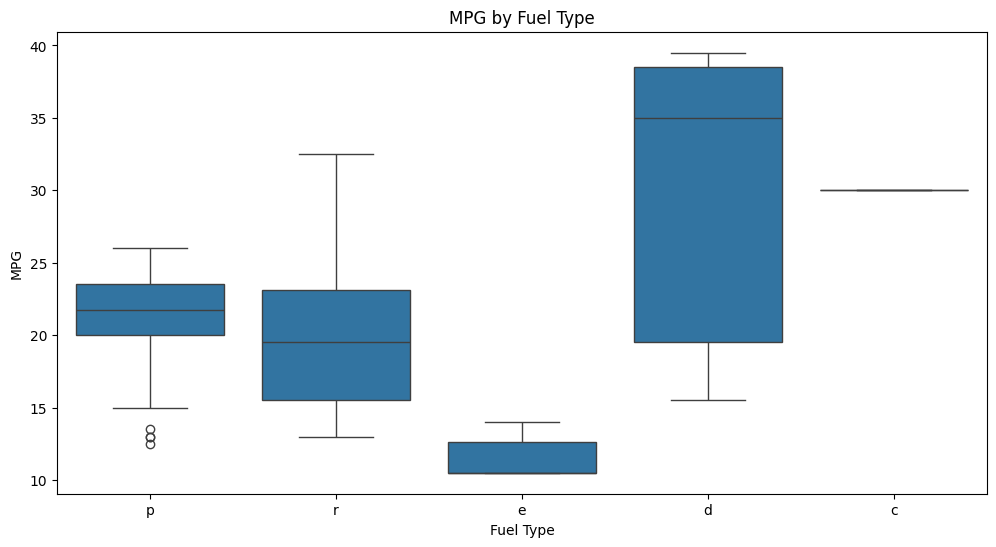

In [25]:
# 평균 연비와 연료 종류의 관계 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='fl', y='mpg', data=mpg)
plt.title('MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('MPG')
plt.show()

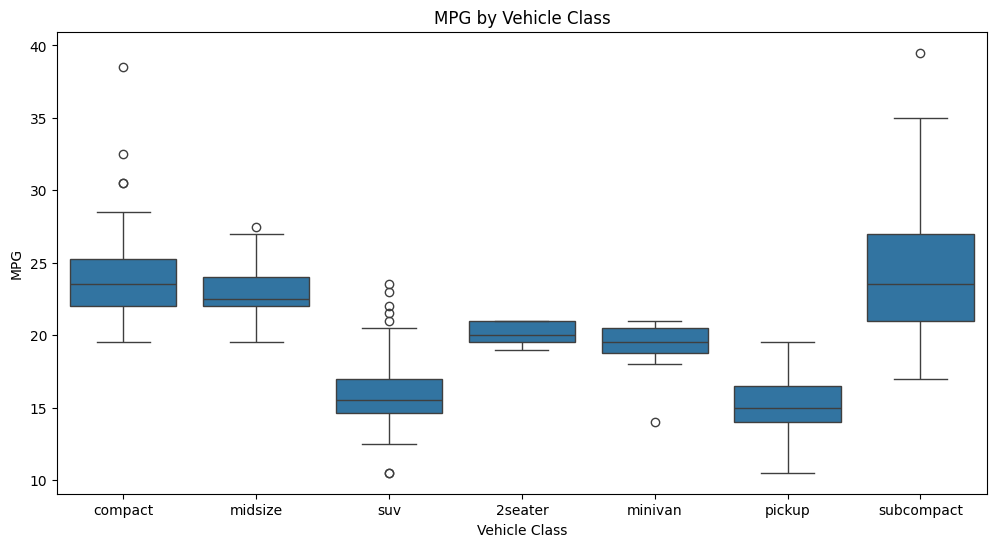

In [26]:
# 평균 연비와 자동차 유형의 관계 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='mpg', data=mpg)
plt.title('MPG by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('MPG')
plt.show()

제조사 같은 경우 제조사가 다양한 차량을 만들기 때문에 주로 만드는 차량에 따라서 연비와 관련이 있을 수는 있지만 제조사와 연비가 관련이 있다고 보긴 힘들기에 제외   

차량 종류 같은 경우에도 이 차량 종류가 연비와 상관이 있는 모습은 보여주지만 차량종류에서 주로 사용하는 변속기, 연료, 구동 방법 등에 영향을 받아 특징적인 모습을 보여주는 것으로 보고 제외  

회귀 분석 실시(연비- 양적 자료, 범주형 자료)

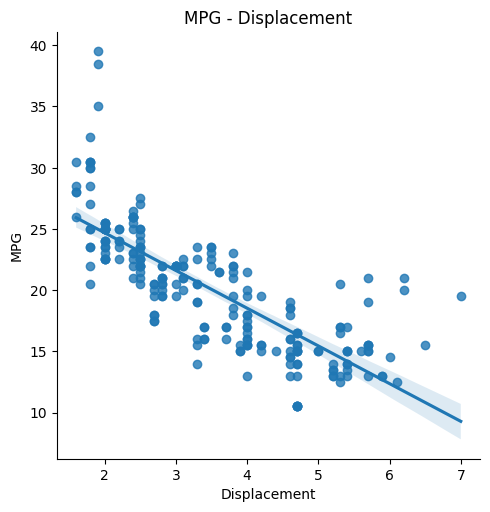

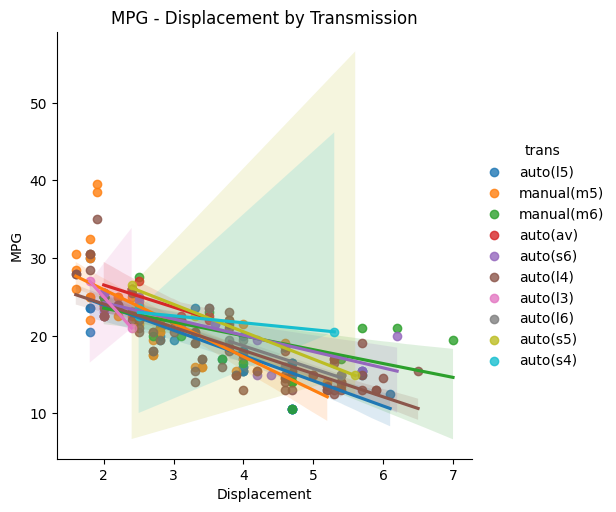

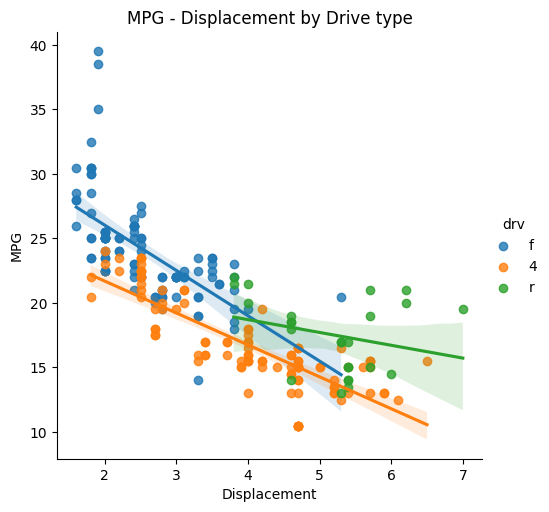

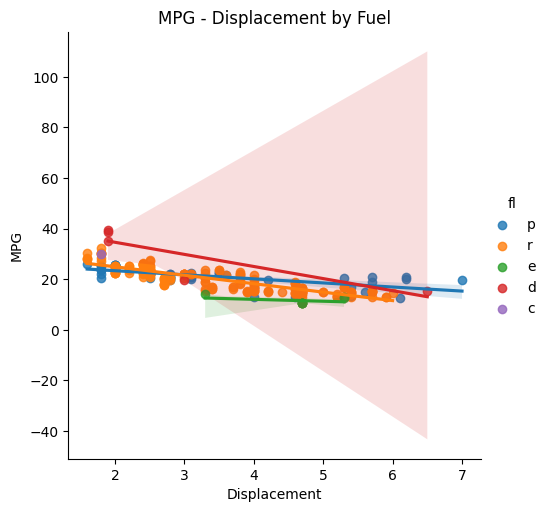

In [27]:
# 평균 연비와 배기량 간의 회귀 분석 시각화
sns.lmplot(data=mpg, x='displ', y='mpg')
plt.title('MPG - Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

sns.lmplot(data=mpg, x='displ', y='mpg', hue='trans') # 변속기에 대한 추가 분석
plt.title('MPG - Displacement by Transmission')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

sns.lmplot(data=mpg, x='displ', y='mpg', hue='drv') # 구동방식에 대한 추가 분석
plt.title('MPG - Displacement by Drive type')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

sns.lmplot(data=mpg, x='displ', y='mpg', hue='fl') # 연료에 대한 추가 분석
plt.title('MPG - Displacement by Fuel')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

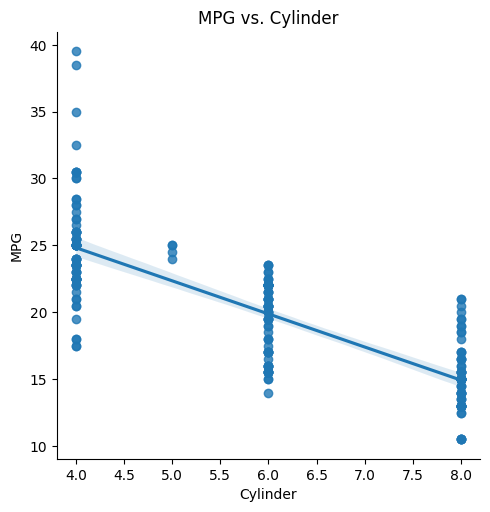

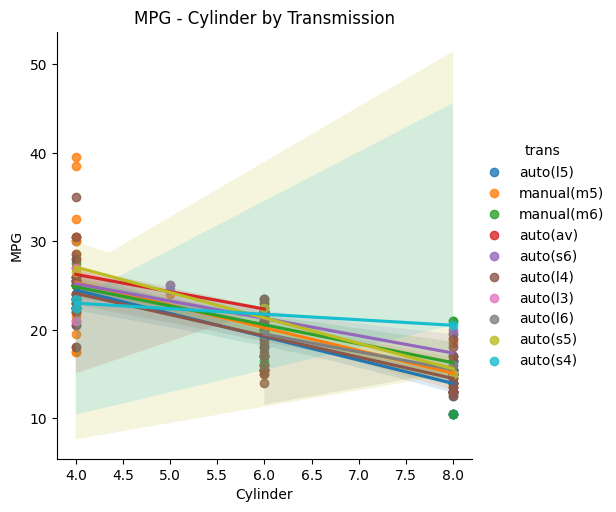

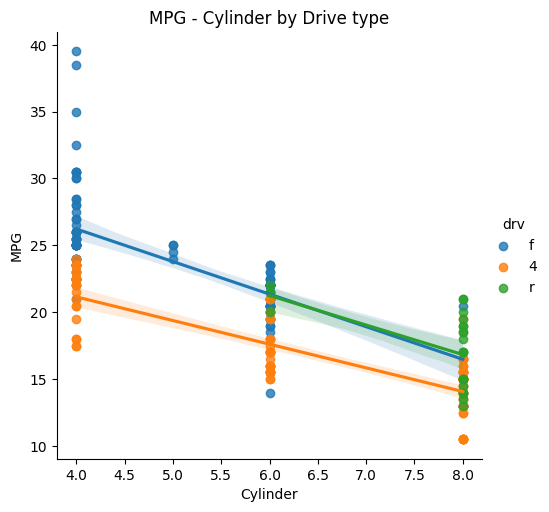

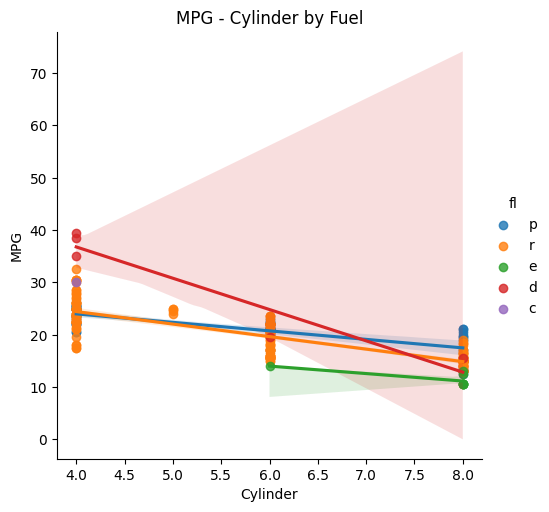

In [28]:
# 평균 연비와 실린더 수 간의 회귀 분석 시각화
sns.lmplot(data=mpg, x='cyl', y='mpg')
plt.title('MPG vs. Cylinder')
plt.xlabel('Cylinder')
plt.ylabel('MPG')
plt.show()

sns.lmplot(data=mpg, x='cyl', y='mpg', hue='trans') # 변속기에 대한 추가 분석
plt.title('MPG - Cylinder by Transmission')
plt.xlabel('Cylinder')
plt.ylabel('MPG')
plt.show()

sns.lmplot(data=mpg, x='cyl', y='mpg', hue='drv') # 구동방식에 대한 추가 분석
plt.title('MPG - Cylinder by Drive type')
plt.xlabel('Cylinder')
plt.ylabel('MPG')
plt.show()

sns.lmplot(data=mpg, x='cyl', y='mpg', hue='fl') # 연료에 대한 추가 분석
plt.title('MPG - Cylinder by Fuel')
plt.xlabel('Cylinder')
plt.ylabel('MPG')
plt.show()

In [29]:
# 선형 회귀 실시 및 요약 출력
y, X = dmatrices('mpg ~ displ + cyl + trans + drv + fl', data=mpg, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     76.08
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.49e-81
Time:                        18:29:49   Log-Likelihood:                -483.02
No. Observations:                 234   AIC:                             1002.
Df Residuals:                     216   BIC:                             1064.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              33.2704    

주요 요인 분석  

통계적으로 유의미한 변수:   

구동 방식 (drv):  
drv[T.f] (전륜구동): 계수 = 3.7339, p-값 = 0.000  
전륜구동 차량은 기준(drv=4)에 비해 연비가 3.7339 단위만큼 높습니다.  
drv[T.r] (후륜구동): 계수 = 3.6107, p-값 = 0.000  
후륜구동 차량도 기준(drv=4)에 비해 연비가 3.6107 단위만큼 높습니다.  

연료 유형 (fl):  
fl[T.e] (연료 유형 e): 계수 = -8.4219, p-값 = 0.000  
연료 유형이 e인 차량은 기준(fl=c)에 비해 연비가 8.4219 단위만큼 낮습니다.  
fl[T.p] (연료 유형 p): 계수 = -4.4502, p-값 = 0.031  
연료 유형이 p인 차량도 기준(fl=c)에 비해 연비가 4.4502 단위만큼 낮습니다.  
fl[T.r] (연료 유형 r): 계수 = -4.4312, p-값 = 0.030  
연료 유형이 r인 차량 역시 기준(fl=c)에 비해 연비가 4.4312 단위만큼 낮습니다.  

배기량 (displ): 계수 = -1.0495, p-값 = 0.001  
배기량이 증가할수록 연비가 기준(trans=auto(av))에 비해 1.0495 단위만큼 낮아집니다.  

실린더 수 (cyl): 계수 = -1.0756, p-값 = 0.000  
실린더 수가 증가할수록 연비가 기준(trans=auto(av))에 비해 1.0756 단위만큼 낮아집니다.  

통계적으로 유의미하지 않은 변수:  
변속기 유형 (trans): 대부분의 변속기 유형은 통계적으로 유의미하지 않습니다. 이는 변속기 유형이 연비에 큰 영향을 미치지 않음을 의미합니다.  
  
종합 분석  
구동 방식 (drv):
전륜구동(drv[T.f])과 후륜구동(drv[T.r]) 차량은 기준(drv=4)에 비해 연비가 높습니다. 이는 구동 방식이 연비에 중요한 영향을 미친다는 것을 나타냅니다.  

연료 유형 (fl):
연료 유형이 e, p, r인 차량은 기준(fl=c)에 비해 연비가 낮습니다. 특히 연료 유형 e의 경우 연비가 크게 낮아지는 것을 볼 수 있습니다. 이는 연료 유형이 연비에 중요한 영향을 미친다는 것을 나타냅니다.  

**배기량 (displ)**과 실린더 수 (cyl):
배기량과 실린더 수가 증가할수록 연비가 기준(trans=auto(av))에 비해 감소합니다. 이는 큰 엔진을 가진 차량이 작은 엔진을 가진 차량보다 연비가 낮다는 것을 의미합니다.  

변속기 유형 (trans):
대부분의 변속기 유형은 통계적으로 유의미하지 않습니다. 이는 변속기 유형이 연비에 큰 영향을 미치지 않는다는 것을 나타냅니다.  

결론
연비에 큰 영향을 미치는 요인은 구동 방식, 연료 유형, 배기량, 그리고 실린더 수입니다. 특히 전륜구동과 후륜구동 차량은 연비가 좋고, 연료 유형이 e, p, r인 차량은 연비가 나쁩니다. 또한, 배기량과 실린더 수가 많을수록 연비가 낮아집니다. 이러한 결과를 바탕으로 차량의 연비 개선을 위해서는 적절한 구동 방식과 연료 유형을 선택하고, 배기량과 실린더 수를 최적화하는 것이 중요합니다.

굉장히 많은 독립 변수에 대해서 선형회귀를 진행하였기 때문에 다중공선성에 의한 문제가 발생할 수 있었다고 생각하여 위의 분석을 제외하고도 다중공선성에 의한 영향을 고려한 분석 또한 진행하였다.    
VIF를 확인하여 다중공선성이 존재하는지 여부를 확인하고 전진 선택법 및 후진 제거법을 진행하여 선택된 독립 변수 들에 대하여 분석을 진행하려고 한다.

In [33]:
# VIF를 이용한 다중공선성 분석
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF Factor', ascending=False)
vif = vif.reset_index(drop=True)
vif

,Feature,VIF Factor
0,Intercept,326.930113
1,fl[T.r],49.794962
2,fl[T.p],42.946478
3,trans[T.auto(l4)],12.676463
4,trans[T.manual(m5)],10.556522
5,displ,10.151383
6,fl[T.e],9.073317
7,trans[T.auto(l5)],8.197361
8,cyl,8.162501
9,fl[T.d],6.062804


In [34]:
# 전진 선택법 적용
# 종속 변수와 독립 변수 설정
y, X = dmatrices('mpg ~ displ + cyl + trans + drv + fl', data=mpg, return_type='dataframe')

# 전진 선택법 함수 정의
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while initial_features:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

Selected features: ['Intercept', 'cyl', 'drv[T.f]', 'fl[T.d]', 'drv[T.r]', 'fl[T.e]', 'trans[T.auto(l4)]', 'displ']


In [35]:
# 후진 제거법 적용
y, X = dmatrices('mpg ~ displ + cyl + trans + drv + fl', data=mpg, return_type='dataframe')

# 후진 제거법 함수 정의
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        model = sm.OLS(target, sm.add_constant(data[features])).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

selected_features = backward_elimination(X, y)
print("Selected features:", selected_features)

Selected features: ['Intercept', 'trans[T.auto(l4)]', 'drv[T.f]', 'drv[T.r]', 'fl[T.d]', 'fl[T.e]', 'displ', 'cyl']


전진 선택법 및 후진 제거법을 적용하여 선택한 독립 변수는 모두 ['Intercept', 'cyl', 'drv[T.f]', 'fl[T.d]', 'drv[T.r]', 'fl[T.e]', 'trans[T.auto(l4)]', 'displ']으로 같았고 이에 대한 분석을 하려고 한다.

In [36]:
# 선택된 독립 변수들에 대한 다중 선형 회귀 분석
X_selected = X[selected_features]
model = sm.OLS(y, X_selected).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           3.08e-88
Time:                        18:50:51   Log-Likelihood:                -491.24
No. Observations:                 234   AIC:                             998.5
Df Residuals:                     226   BIC:                             1026.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            28.5681      0.70

결론  
전진 선택법 및 후진 제거법을 통해서 나온 결과로 선택된 데이터들에 대해서만 다중 선형 회귀분석을 진행한 결과  
변속기 유형 (trans):  
변속기 유형의 경우 하나만 선택되었기에 하나로만 전체 모델을 표현할 수 있다는 것은 변속기의 유형에 따라서 연비에 큰 차이가 없다는 것이다.   

구동 방식 (drv):
전륜구동(drv[T.f])과 후륜구동(drv[T.r]) 차량은 기준(drv=4)에 비해 연비가 높습니다. 이는 구동 방식이 연비에 중요한 영향을 미친다는 것을 나타냅니다.

연료 유형 (fl):
연료 유형이 e인 차량은 기준(fl=c)에 비해 연비가 많이 낮습니다. 그리고 연료 유형이 d인 차량은 기준(fl=c)에 비해 연비가 매우 높습니다. 이는 연료유형이 연비에 중요한 영향을 미친다는 것을 나타냅니다.

배기량 (displ)과 실린더 수 (cyl):
배기량과 실린더 수가 증가할수록 연비가 감소합니다. 이는 실린더 수가 증가하면 배기량도 증가하고 이렇게 실린더 수가 많은 엔진을 가진 자동차가 연비가 안좋다는 것을 나타냅니다.  

즉 연비에 큰 영향을 미치는 요인은 구동 방식, 연료 유형, 배기량 및 실린더 수로 구동방식이 사륜구동이 아닐 때, 연료가 디젤일 때, 엔진의 배기량이 크지 않을 때 연비가 좋아질 것으로 보입니다.